In [ ]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dfRapidTransit = pd.read_csv("Rapid_Transit_and_Bus_Prediction_Accuracy_Data.csv") ## Do not use
dfRidershipByService = pd.read_csv("Ridership_by_Service_Date_and_Line.csv")
dfRidershipByTrip = pd.read_csv("Ridership_by_Trip_Route_Line.csv") ## Do not us
dfStop = pd.read_csv("Stop_Orders.csv")
dfScheduleSummary = pd.read_csv("schedule_summary.csv")
dfScheduleByLine = pd.read_csv("schedules_by_line.csv")
dfStopCoordinates = pd.read_csv("stop_coordinates.csv")

In [ ]:
dfRapidTransit.head(5)

,weekly,mode,route_id,bin,arrival_departure,num_predictions,num_accurate_predictions,OBJECTID
0,2020-08-06,bus,NaN,0-3 min,departure,233967,183615,0
1,2020-08-13,bus,NaN,0-3 min,departure,240187,189546,4
2,2020-08-20,bus,NaN,0-3 min,departure,234504,185137,8
3,2020-08-27,bus,NaN,0-3 min,departure,233453,183216,12
4,2020-09-03,bus,NaN,0-3 min,departure,286631,218150,16


In [ ]:
dfRapidTransit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   weekly                    6772 non-null   object
 1   mode                      6772 non-null   object
 2   route_id                  6064 non-null   object
 3   bin                       6772 non-null   object
 4   arrival_departure         6772 non-null   object
 5   num_predictions           6772 non-null   int64 
 6   num_accurate_predictions  6772 non-null   int64 
 7   OBJECTID                  6772 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 423.4+ KB


In [ ]:
dfRapidTransit.isnull().sum()

weekly                        0
mode                          0
route_id                    708
bin                           0
arrival_departure             0
num_predictions               0
num_accurate_predictions      0
OBJECTID                      0
dtype: int64

In [ ]:
dfRapidTransit["mode"].unique()

array(['bus', 'subway'], dtype=object)

In [ ]:
dfRidershipByService.head(5)

,service_date,line,estimated_boardings,ObjectId
0,2020-06-22 04:00:00.000000 UTC,Lowell,421.0,6
1,2020-06-23 04:00:00.000000 UTC,Lowell,607.0,18
2,2020-06-24 04:00:00.000000 UTC,Lowell,600.0,30
3,2020-06-25 04:00:00.000000 UTC,Lowell,658.0,42
4,2020-07-02 04:00:00.000000 UTC,Lowell,869.0,52


In [ ]:
dfRidershipByService.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14444 entries, 0 to 14443
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   service_date         14444 non-null  object 
 1   line                 14444 non-null  object 
 2   estimated_boardings  14444 non-null  float64
 3   ObjectId             14444 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 451.5+ KB


In [ ]:
dfRidershipByService.isnull().sum()

service_date           0
line                   0
estimated_boardings    0
ObjectId               0
dtype: int64

In [ ]:
dfRidershipByService['service_date'] = pd.to_datetime(dfRidershipByService['service_date'], utc=True)

# Extract components and create new columns
dfRidershipByService['Year'] = dfRidershipByService['service_date'].dt.year
dfRidershipByService['Month'] = dfRidershipByService['service_date'].dt.month
dfRidershipByService['Day'] = dfRidershipByService['service_date'].dt.day
dfRidershipByService['Time'] = dfRidershipByService['service_date'].dt.strftime('%H:%M:%S')


In [ ]:
dfRidershipByService.head(5)

,service_date,line,estimated_boardings,ObjectId,Year,Month,Day,Time
0,2020-06-22 04:00:00+00:00,Lowell,421.0,6,2020,6,22,04:00:00
1,2020-06-23 04:00:00+00:00,Lowell,607.0,18,2020,6,23,04:00:00
2,2020-06-24 04:00:00+00:00,Lowell,600.0,30,2020,6,24,04:00:00
3,2020-06-25 04:00:00+00:00,Lowell,658.0,42,2020,6,25,04:00:00
4,2020-07-02 04:00:00+00:00,Lowell,869.0,52,2020,7,2,04:00:00


In [ ]:
dfRidershipByService.drop('service_date', axis=1, inplace=True)
dfRidershipByService.head(5)

,line,estimated_boardings,ObjectId,Year,Month,Day,Time
0,Lowell,421.0,6,2020,6,22,04:00:00
1,Lowell,607.0,18,2020,6,23,04:00:00
2,Lowell,600.0,30,2020,6,24,04:00:00
3,Lowell,658.0,42,2020,6,25,04:00:00
4,Lowell,869.0,52,2020,7,2,04:00:00


In [ ]:
dfRidershipByService.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14444 entries, 0 to 14443
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   line                 14444 non-null  object 
 1   estimated_boardings  14444 non-null  float64
 2   ObjectId             14444 non-null  int64  
 3   Year                 14444 non-null  int64  
 4   Month                14444 non-null  int64  
 5   Day                  14444 non-null  int64  
 6   Time                 14444 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 790.0+ KB


In [ ]:
dfRidershipByService["Year"].unique()

array([2020, 2021, 2022, 2023, 2024])

2023    4376
2022    4367
2021    3697
2020    1632
2024     372
Name: Year, dtype: int64


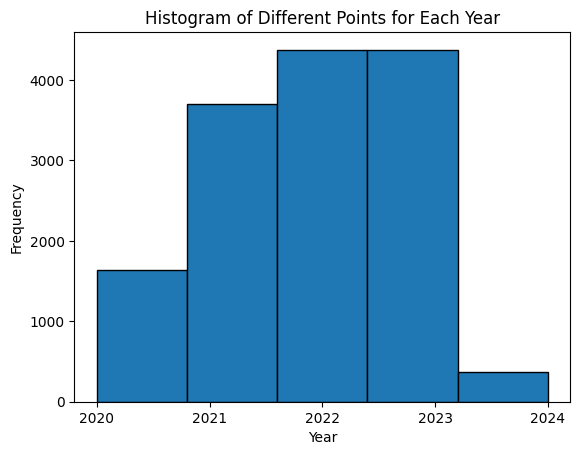

In [ ]:
year_counts = dfRidershipByService['Year'].value_counts()
print(year_counts)

plt.hist(dfRidershipByService['Year'], bins=len(dfRidershipByService['Year'].unique()), edgecolor='black')
plt.title('Histogram of Different Points for Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(dfRidershipByService['Year'].unique())
plt.show()

In [ ]:
dfRidershipByService.drop("estimated_boardings", axis = 1, inplace = True)

In [ ]:
dfRidershipByService.head(5)

,line,ObjectId,Year,Month,Day,Time
0,Lowell,6,2020,6,22,04:00:00
1,Lowell,18,2020,6,23,04:00:00
2,Lowell,30,2020,6,24,04:00:00
3,Lowell,42,2020,6,25,04:00:00
4,Lowell,52,2020,7,2,04:00:00


In [ ]:
dfRidershipByTrip.head(5)

,season,route_id,route_name,train,direction_id,day_type_id,day_type_name,stop_time,stop_id,stopsequence,average_ons,average_offs,average_load,ObjectId
0,Spring 2012,CR-Lowell,Lowell Line,302,1,day_type_01,weekday,2018-01-01 10:35:00.000000 UTC,Lowell,1,104.0,NaN,104.0,1922
1,Spring 2012,CR-Lowell,Lowell Line,304,1,day_type_01,weekday,2018-01-01 11:18:00.000000 UTC,Lowell,1,183.0,NaN,183.0,1930
2,Spring 2012,CR-Lowell,Lowell Line,306,1,day_type_01,weekday,2018-01-01 11:51:00.000000 UTC,Lowell,1,209.0,NaN,209.0,1938
3,Spring 2012,CR-Lowell,Lowell Line,308,1,day_type_01,weekday,2018-01-01 12:18:00.000000 UTC,Lowell,1,206.0,NaN,206.0,1946
4,Spring 2012,CR-Lowell,Lowell Line,310,1,day_type_01,weekday,2018-01-01 12:46:00.000000 UTC,Lowell,1,266.0,NaN,266.0,2003


In [ ]:
dfRidershipByTrip.drop(["average_ons", "average_offs", "average_load", "route_name"], axis = 1, inplace = True)

In [ ]:
dfRidershipByTrip.head(5)

,season,route_id,train,direction_id,day_type_id,day_type_name,stop_time,stop_id,stopsequence,ObjectId
0,Spring 2012,CR-Lowell,302,1,day_type_01,weekday,2018-01-01 10:35:00.000000 UTC,Lowell,1,1922
1,Spring 2012,CR-Lowell,304,1,day_type_01,weekday,2018-01-01 11:18:00.000000 UTC,Lowell,1,1930
2,Spring 2012,CR-Lowell,306,1,day_type_01,weekday,2018-01-01 11:51:00.000000 UTC,Lowell,1,1938
3,Spring 2012,CR-Lowell,308,1,day_type_01,weekday,2018-01-01 12:18:00.000000 UTC,Lowell,1,1946
4,Spring 2012,CR-Lowell,310,1,day_type_01,weekday,2018-01-01 12:46:00.000000 UTC,Lowell,1,2003


In [ ]:
dfRidershipByTrip["season"].unique()

array(['Spring 2012', 'Spring 2018'], dtype=object)

In [ ]:
dfStop.head(5)

,route_id,direction_id,first_stop,last_stop,stop_order,stop_id,stop_name,ObjectId
0,Red,0,Alewife,Ashmont,17,place-asmnl,Ashmont,58
1,Red,0,Alewife,Braintree,1,place-alfcl,Alewife,60
2,Red,0,Alewife,Braintree,2,place-davis,Davis,61
3,Red,0,Alewife,Braintree,3,place-portr,Porter,62
4,Red,0,Alewife,Braintree,4,place-harsq,Harvard,63


In [ ]:
dfStop["route_id"].unique()

array(['Red', 'Blue', 'Green', 'Orange', 'Mattapan'], dtype=object)

In [ ]:
dfScheduleSummary.head(5)

,date,route_id,total_trips,early_am_trips,peak_am_trips,midday_trips,peak_pm_trips,evening_pm_trips,late_pm_trips,local_trips,express_trips,typical_trips,atypical_trips
0,2019-10-05,CR-Lowell,16,0,3,6,4,2,1,16,0,16,0
1,2019-10-06,CR-Lowell,16,0,3,6,4,2,1,16,0,16,0
2,2019-10-12,CR-Lowell,16,0,3,6,4,2,1,16,0,16,0
3,2019-10-13,CR-Lowell,16,0,3,6,4,2,1,16,0,16,0
4,2019-10-19,CR-Lowell,16,0,3,6,4,2,1,16,0,16,0


In [ ]:
dfScheduleSummary.drop(["express_trips", "typical_trips", "atypical_trips","local_trips"], axis = 1, inplace = True)

In [ ]:
dfScheduleSummary.head(5)

,date,route_id,total_trips,early_am_trips,peak_am_trips,midday_trips,peak_pm_trips,evening_pm_trips,late_pm_trips
0,2019-10-05,CR-Lowell,16,0,3,6,4,2,1
1,2019-10-06,CR-Lowell,16,0,3,6,4,2,1
2,2019-10-12,CR-Lowell,16,0,3,6,4,2,1
3,2019-10-13,CR-Lowell,16,0,3,6,4,2,1
4,2019-10-19,CR-Lowell,16,0,3,6,4,2,1


In [ ]:
dfScheduleSummary['date'] = pd.to_datetime(dfScheduleSummary['date'])

dfScheduleSummary['Year'] = dfScheduleSummary['date'].dt.year
dfScheduleSummary['Month'] = dfScheduleSummary['date'].dt.month
dfScheduleSummary['Day'] = dfScheduleSummary['date'].dt.day

dfScheduleSummary.drop("date", axis = 1, inplace = True)
dfScheduleSummary.head(5)


,route_id,total_trips,early_am_trips,peak_am_trips,midday_trips,peak_pm_trips,evening_pm_trips,late_pm_trips,Year,Month,Day
0,CR-Lowell,16,0,3,6,4,2,1,2019,10,5
1,CR-Lowell,16,0,3,6,4,2,1,2019,10,6
2,CR-Lowell,16,0,3,6,4,2,1,2019,10,12
3,CR-Lowell,16,0,3,6,4,2,1,2019,10,13
4,CR-Lowell,16,0,3,6,4,2,1,2019,10,19


In [ ]:
dfScheduleSummary["Year"].unique()

array([2019, 2020, 2021, 2022])

In [ ]:
dfScheduleSummary["Year"].value_counts()

2020    4237
2021    4027
2022    2644
2019    1026
Name: Year, dtype: int64

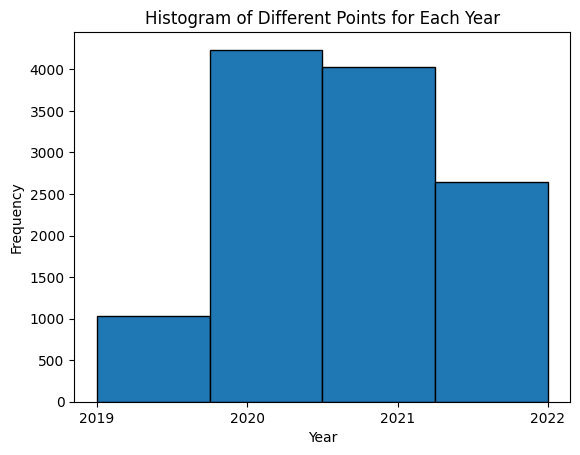

In [ ]:
plt.hist(dfScheduleSummary['Year'], bins=len(dfScheduleSummary['Year'].unique()), edgecolor='black')
plt.title('Histogram of Different Points for Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(dfScheduleSummary['Year'].unique())
plt.show()

In [ ]:
dfScheduleByLine.head(5)

,date,time,trip_id,line_id,route_id,route_pattern_id,route_name,route_pattern_name,service_id,service_typicality,direction,from_station,to_station
0,2020-03-01,07:50:00,CR-Sunday-DivWorcesterPTC-20-2501-BackBayFrami...,line-Worcester,CR-Worcester,CR-Worcester-0-0_Back Bay_Framingham_2,Framingham/Worcester Line,Framingham - Worcester,CR-Su-Worcester-DivWorcesterPTC-20,4,0,Framingham,Worcester
1,2020-03-08,07:50:00,CR-Sunday-DivWorcesterPTC-20-2501-BackBayFrami...,line-Worcester,CR-Worcester,CR-Worcester-0-0_Back Bay_Framingham_2,Framingham/Worcester Line,Framingham - Worcester,CR-Su-Worcester-DivWorcesterPTC-20,4,0,Framingham,Worcester
2,2020-03-15,07:50:00,CR-Sunday-DivWorcesterPTC-20-2501-BackBayFrami...,line-Worcester,CR-Worcester,CR-Worcester-0-0_Back Bay_Framingham_2,Framingham/Worcester Line,Framingham - Worcester,CR-Su-Worcester-DivWorcesterPTC-20,4,0,Framingham,Worcester
3,2020-03-22,07:50:00,CR-Sunday-DivWorcesterPTC-20-2501-BackBayFrami...,line-Worcester,CR-Worcester,CR-Worcester-0-0_Back Bay_Framingham_2,Framingham/Worcester Line,Framingham - Worcester,CR-Su-Worcester-DivWorcesterPTC-20,4,0,Framingham,Worcester
4,2020-03-29,07:50:00,CR-Sunday-DivWorcesterPTC-20-2501-BackBayFrami...,line-Worcester,CR-Worcester,CR-Worcester-0-0_Back Bay_Framingham_2,Framingham/Worcester Line,Framingham - Worcester,CR-Su-Worcester-DivWorcesterPTC-20,4,0,Framingham,Worcester


In [ ]:
dfScheduleByLine.drop(["trip_id", "line_id", "route_id", "route_pattern_id", "route_name", "route_pattern_name", "service_id", "service_typicality"], axis = 1, inplace = True)
dfScheduleByLine.head(5)

,date,time,direction,from_station,to_station
0,2020-03-01,07:50:00,0,Framingham,Worcester
1,2020-03-08,07:50:00,0,Framingham,Worcester
2,2020-03-15,07:50:00,0,Framingham,Worcester
3,2020-03-22,07:50:00,0,Framingham,Worcester
4,2020-03-29,07:50:00,0,Framingham,Worcester


In [ ]:
dfScheduleByLine['date'] = pd.to_datetime(dfScheduleByLine['date'])

dfScheduleByLine['Year'] = dfScheduleByLine['date'].dt.year
dfScheduleByLine['Month'] = dfScheduleByLine['date'].dt.month
dfScheduleByLine['Day'] = dfScheduleByLine['date'].dt.day
dfScheduleByLine.drop("date", axis = 1, inplace = True)
dfScheduleByLine.head(5)

,time,direction,from_station,to_station,Year,Month,Day
0,07:50:00,0,Framingham,Worcester,2020,3,1
1,07:50:00,0,Framingham,Worcester,2020,3,8
2,07:50:00,0,Framingham,Worcester,2020,3,15
3,07:50:00,0,Framingham,Worcester,2020,3,22
4,07:50:00,0,Framingham,Worcester,2020,3,29


In [ ]:
print(dfScheduleByLine["from_station"].unique())
print()
print(dfScheduleByLine["to_station"].unique())

['Framingham' 'Worcester' 'Attleboro' 'South Station' 'Stoughton']

['Worcester' 'Framingham' 'South Station' 'Stoughton' 'Ashland']


In [ ]:
dfScheduleByLine["Year"].value_counts()

2021    13748
2020    11986
2022    11860
2019     4714
Name: Year, dtype: int64

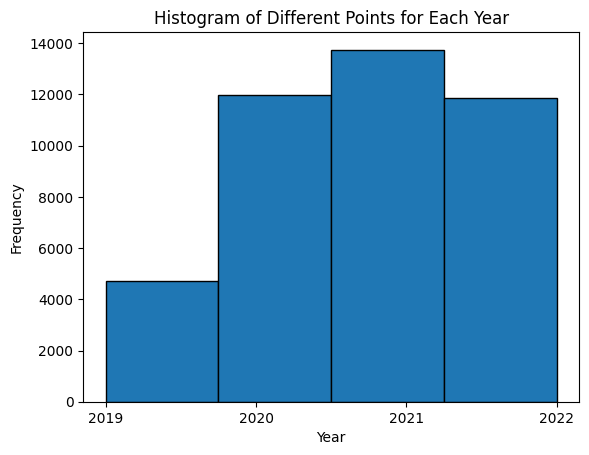

In [ ]:
plt.hist(dfScheduleByLine['Year'], bins=len(dfScheduleByLine['Year'].unique()), edgecolor='black')
plt.title('Histogram of Different Points for Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(dfScheduleByLine['Year'].unique())
plt.show()

In [ ]:
csv_file_path = 'New_Ridership_by_Service_Date_and_Line.csv'
dfRidershipByService.to_csv(csv_file_path, index=False)

from google.colab import files
files.download('New_Ridership_by_Service_Date_and_Line.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
csv_file_path = 'New_Stop_Orders.csv'
dfStop.to_csv(csv_file_path, index=False)

from google.colab import files
files.download('New_Stop_Orders.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
csv_file_path = 'New_schedules_by_line.csv'
dfScheduleByLine.to_csv(csv_file_path, index=False)

from google.colab import files
files.download('New_schedules_by_line.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
csv_file_path = 'New_schedule_summary.csv'
dfScheduleSummary.to_csv(csv_file_path, index=False)

from google.colab import files
files.download('New_schedule_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfScheduleByLine["from_station"].unique()

array(['Framingham', 'Worcester', 'Attleboro', 'South Station',
       'Stoughton'], dtype=object)

In [ ]:
dfScheduleByLine["to_station"].unique()

array(['Worcester', 'Framingham', 'South Station', 'Stoughton', 'Ashland'],
      dtype=object)

In [ ]:
newSchedule = dfScheduleByLine[dfScheduleByLine["from_station"] == "South Station"]